<h1>Math</h1>

Now we will discuss an important practical problem in ML , hyperparameters and how to choose them

one method is called cross-validation

for ex : in KNN how to choose K ?

Descision tree : max depth ?

Bayes classifier : likelihood distribution ?

Perceptron : learning rate ?

all the above are hyperpatameters which can be discrete or contineous

sometimes we can use knowledge of algorithm to guide us

for ex: we know that for KNN , K=1 gives a fine grained decision boundary which can can lead to severe overfitting , as we increase K we get a smoother boundary , but too large K could lead to underfitting , it also increases time for prediciton

another ex : in decision trees if we dont limit the max_depth we can get 100% training accuracy  , but we wont generalise well , but to short wont get pattern well too

one popular method for choosing hyperparameters is K-fold cross-validation

split data into K parts (typical values for K = 5,8,10)

Loop K times

each iteration , take 1 part (use it for validation) , and the rest for training

for ex K = 3:

<table>
    <tr>
        <td>Iteration 1</td>
        <td style="color: orange;">VALIDATION</td>
        <td>TRAIN</td>
        <td>TRAIN</td>
    </tr>
    <tr>
        <td>Iteration 2</td>
        <td>TRAIN</td>
        <td style="color: orange;">VALIDATION</td>
        <td>TRAIN</td>
    </tr>
    <tr>
        <td>Iteration 2</td>
        <td>TRAIN</td>
        <td>TRAIN</td>
        <td style="color: orange;">VALIDATION</td>
    </tr>
    
</table>

Here is some psuedocode :
```python
scores = []
sz = N/K
for i in range(K):
    X_valid,Y_valid = X[i*sz:(i+1)*sz] , Y[i*sz:(i+1)*sz]
    X_train,Y_train = concat(X[0:i*siz], X[(i+1)*sz:N]) , concat(Y[0:i*siz] , Y[(i+1)*sz:N])
    model.fit(X_train,Y_train)
    scores.append(model.score(X_valid,Y_valid))
return scores

```

as we can see our algorithm return K different scores (accuracies) , we can simply use the mean as a measure to compare how goor this hyperparameter setting was

we can also use statistical testing to check if one htperparameter setting is "statistically significantly " better than another

Sci-kit Learn has its own implementationof K-fold cross calidation 

```python
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model,X,Y,cv=K)

```

<h1>Math</h1>

now we want to discuss one more important topic in machine learning feature extraction and feature selection

first lets talk about feature extraction , consider the donut problem , can we solve it using the perceptron ?

clearly no since the decision boundary is a circle , BUT if we add the feature $r = \sqrt{(x_1^2 + x_2^2)}$ , (r is the radius) , we can solve the problem using this feature alone

a lot of the time this requires domain knowledge which would provide intimate knowledge od fata

know lets say we are some domain expert that extracted some features , how to choose the most powerful and discriminatory features ?

now we talk about feature selection

The method we will discuss is adding features greedly

first we build a classifier for each individual feature , then pick the best one using cross-validation , this would be the most powerful feature

then we build another set of classifiers , all which use the first feature + one other feature , then pick the best one using corss-validation

Repeat

Another feature extraction/selection method is PCA (principal component Analysis) , which is an automatic method for dimensionality reduction that does not require domain knowledge 

All outputs are uncolerated so no redundancy

outputs are sorted by information contained (measured by variance)

so we can choose a subset of features such that to retain 95% or 99% (or any other threshold) of the original variance and discard the rest (and that would be feature selection)

problem : its only a linear transformation

<h1>Math</h1>

we want to discuss the advantages and disadvantages of the ML models we talked about in comparison to deep learning

$training \ and \  prediction \ time :$

KNN : training is fast , predicition is slow

Decision Tree : training is slow , prediction is fast

Deep learning : training can take multiple days or weeks , but scales well to data size (no need to load all data to RAM simultaneously) , prediction is fast , but not as fast as a linear model

so we need to consider training and predicition times depending on our use

$Decision \ boundary :$ 

Linear/quadratic modles have linear/quadratic decision boundary

Decision tree boundaries are orthogonal to axes

Deep learning can find highly complex/nonlinear decision boundaries , in theory they can approximate any function

an advantage of deep learning is that it finds these boundaries automatically . no need to manually extract features , as an ex , a neural network can solve the donut problem

even steps like PCA/dimensionality reduction are done automatically by neural network , in a nonlinear manner (but still extremely helpful to provide NN with manual features should we know them)

$Interpretability :$

people like models that are explainable

Linear models : each input is associated with a weight (magnitude + sign)

Decision tree : each node is a decision based on a real attribute

unless we need to squeeze out a half percentage of improvememnt in accuracy , it is preferable to use a simpler model

ANN (artificial neural netwokrs) are difficult to interpret , there is no physical meaning to a nonlinear function of input variables

$Hyperparameters$

ANN have many hyperparameters and need may need lots of tuning

until we find the right hyperparameters , simpler models can work better AND faster ('out of the box)

Dont need to spend days/weeks tuning th ANN (learning_rate , num of epochs , hidden layers ,etc.)

$conclusion$

if we want something simple,fast and interpretable : probably not deep learning

acheive state of the art results , lots of time to tune hyperparameters : try deep learning

<h1>Math</h1>

lets discuss Multiclass classification

in binary classification we have only 2 possible outcomes 

in multiclass classification we may have more than 2 classes to choose from

some algorithms naturally support multiple class without any modification : KNN

fot models that support only binary classification , there are other schemes available

$One \ vs \ the \ Rest$


for K classes , write K different 1 vs all other classes classifiers , let all classifiers make prediciton then pick one with highest score

problems:

the model may be slow , and now we need k different models , much slower

not all models return a score , some models just return a class , in this case we would need to vote but then we may get a tie

creates class imbalances in training data

$One \  vs \  One$

one class vs another class at a time (no imbalance)

problems : 

requires $\frac {K(K-1)}{1}$ classifiers ! $O(K^2)$ , so wont scale if we have 1 million classes , ex: vocabulary

can still end up with a tie

<h1>Math</h1>

we want to talk about a popular ML library for python Sci-kit Learn

Sci-kit Learn has lots of models , all following the same API we used in the few previous models , so we expext all models to have fit(X,Y) , predict(X) , score(X,Y)

one big advantage of logistic regression / Bayes / neural networks is that we get p(C|X)

for ex: we are more confident in p(C|X) = 0.99 than p(C|X) = 0.55 , though both give the same class

with sklearn , even decision trees and KNN get a probabilisitc output , if available we can get it using:

```python
model.predict_proba(X)
```
so sometimes we need p(C|X) rather than rounded predicition , for ex: kaggle constest in which submission is mmeasured by cross_entropy loss

Another example of where this might be useful is AUC (Are Under Curve ) , the curve is the ROC curve (receiver operating characterisitc) !!??

ROC is a plot with TPR (True positive rate) on y-axis , and FPR (False positive rate) on x-axis

$$TPR = \frac {TP}{TP+FN}$$
$$FPR = \frac {RP}{FP+TN}$$

random guessing - gives a diagonal line and an AUC = 0.5

perfect (0,0) $\to$ (0,100) $\to$ (100,100) , covers all graph , area = 1

real problem , area betweeen 0.5 and 1



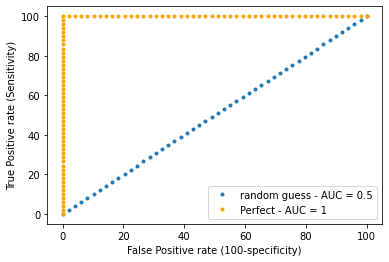

In [63]:
import matplotlib.pyplot as plt 
import numpy as np
points = np.linspace(0,100,50)
plt.plot(points,points,'.',label = 'random guess - AUC = 0.5')
plt.xlabel('False Positive rate (100-specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
plt.plot([0]*50,points ,'.' , label = 'Perfect - AUC = 1' ,  c='orange')
plt.plot(points,[100]*50 , '.', c = 'orange')
plt.legend()
plt.show()

but how do we create ROC curve ? 

Typically we chosoe 0.5 as a thresold so , if p(C|X) > 0.5 predict 1 , if p(C|X) < 0.5 , choose 0

But we can choose different thresholds too (ex:0.3)

ROC curve is plot of TPR and FPR for different setting of threshold from 0...1

as a reminder , there is only one threshold since we ise binary classification

but why would we want to use different thresholds ?

in some instances we can tolerate falso positive and we want to predict the positive class more often

for ex: medical diagnosis : we can tolerate false positive , but we dont want to risk getting a false negative and not treating someone who could be at risk of being sick , so in this case we might lower the threshold and predict the positive class more often even if we are wrong


Another example of when we woudl want to use AUC is imbalanced classes

if we have 10 samples from class 0 , 990 samples from class 1 , and we always predict class 1 , so we actually learnt nothing , we would get an accuracy of 99% , AUC will produce a more useful number

Sci-Kit learn :

```python
sklearn.metric.roc_auc_score(y_true,y_score)
# y_true : true labels
# y_score : output probabilitites
```

Sci-kit learn also has regression versions of many classifiers/models ! 


Model still have same functional API , fit() , predict() , score() , score() returns $R^2$

finally Sci-kit learn allows us to save and load models through pickle library , here is a code example

```python
import pickle

model = DecisionTreeClassifier()
model.fit(X,Y)

# save model
with open('mymodel.pkl','wb') as f:
    pickle.dump(model,f)
    
# load model
with open('mymodel.pkl',) as f:
    model . pickle.load(f) # already trained !!!
```









<h1>code</h1>

In [66]:
# lets take an example of how to do regression using scikit learn
# once we see how , it would be easy to deploy any other model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

In [67]:
N = 200
X = np.linspace(0,10,N).reshape(N,1)
Y = np.sin(X)

Ntrain = 20
idx = np.random.choice(N,Ntrain)
Xtrain = X[idx]
Ytrain = Y[idx]

In [69]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(Xtrain,Ytrain)
Yknn = knn.predict(X)

In [70]:
dt = DecisionTreeRegressor()
dt.fit(Xtrain,Ytrain)
Ydt = dt.predict(X)

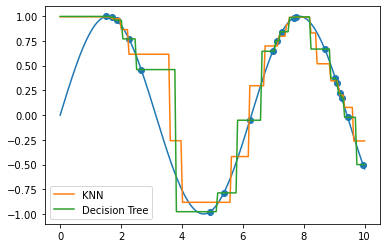

In [71]:
plt.scatter(Xtrain,Ytrain)
plt.plot(X,Y)
plt.plot(X,Yknn,label='KNN')
plt.plot(X,Ydt,label='Decision Tree')
plt.legend()
plt.show()

In [83]:
# notice how the decision tree passes through all the training points
# but misses the general trend of the data , overfitting
# perhaps thats because we passed no parameter specifying max depth

# in KNN we set n_neighbors = 2
# it should be clear that KNN looks for 2 closest points and predicts average 
# notice how each intersection with the curve is at a midpoint